In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
from statistics import mode

In [ ]:
#read the loan file and explore the date
loan =pd.read_csv('https://raw.githubusercontent.com/Prince10oct/lendingCaseStudy/master/loan.csv')

<ipython-input-436-9a020ca10176>:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan =pd.read_csv('https://raw.githubusercontent.com/Prince10oct/lendingCaseStudy/master/loan.csv')


In [ ]:
#printing the shape of the dataframe
loan.shape

(39717, 111)

In [ ]:
#display the top 5 row in the given dataSet
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
#display the tail 5 row in the dataSet
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING

In [ ]:
#To check the details of the data values and their data type of each of the columns

# Display information about the DataFrame including data types and null counts
null_counts = {
    'index':loan.columns,
    'values':loan.isnull().sum()
}
df=pd.DataFrame(null_counts)

In [ ]:
'''
Dropping all columns which have all null values
'''
loan=loan.drop(df.loc[df['values']==39717]['index'],axis=1)
loan.shape

(39717, 57)

In [ ]:
type(loan)

pandas.core.frame.DataFrame

In [ ]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [ ]:
#dropping id and memeber id columns as they wont be useful in model building
loan=loan.drop(['id','member_id'],axis=1)

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [ ]:
loan['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [ ]:
#all the interest rates are in percentages so removing % sign and converting it to float
loan['int_rate']=loan['int_rate'].apply(lambda x:x.strip('%'))
loan['int_rate']=loan['int_rate'].astype('float')
loan['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [ ]:
loan['term']

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 39717, dtype: object

In [ ]:
#all the term duration is in months so removing suffix and converting to int
loan['term']=loan['term'].apply(lambda x:x.strip(' months'))
loan['term']=loan['term'].astype('int')
loan['term']

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int64

In [ ]:
loan['grade']

0        B
1        C
2        C
3        C
4        B
        ..
39712    A
39713    C
39714    A
39715    A
39716    E
Name: grade, Length: 39717, dtype: object

In [ ]:
loan['sub_grade']

0        B2
1        C4
2        C5
3        C1
4        B5
         ..
39712    A4
39713    C1
39714    A4
39715    A2
39716    E2
Name: sub_grade, Length: 39717, dtype: object

In [ ]:
#since sub grade even captures grade so dropping grade
loan=loan.drop('grade',axis=1)

In [ ]:
loan['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [ ]:
loan['home_ownership']

0            RENT
1            RENT
2            RENT
3            RENT
4            RENT
           ...   
39712    MORTGAGE
39713        RENT
39714    MORTGAGE
39715    MORTGAGE
39716         OWN
Name: home_ownership, Length: 39717, dtype: object

In [ ]:
loan['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object

In [ ]:
#converting issue_d to datetime
loan['issue_d']=loan['issue_d'].apply(lambda x:datetime.strptime(x,'%b-%d'))
loan['issue_d']

0       1900-12-11
1       1900-12-11
2       1900-12-11
3       1900-12-11
4       1900-12-11
           ...    
39712   1900-07-07
39713   1900-07-07
39714   1900-07-07
39715   1900-07-07
39716   1900-06-07
Name: issue_d, Length: 39717, dtype: datetime64[ns]

In [ ]:
#extracting month from the date
loan['issue_d_month']=loan['issue_d'].dt.month
loan['issue_d_month']

0        12
1        12
2        12
3        12
4        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: issue_d_month, Length: 39717, dtype: int64

In [ ]:
loan['verification_status']

0               Verified
1        Source Verified
2           Not Verified
3        Source Verified
4        Source Verified
              ...       
39712       Not Verified
39713       Not Verified
39714       Not Verified
39715       Not Verified
39716       Not Verified
Name: verification_status, Length: 39717, dtype: object

In [ ]:
loan['earliest_cr_line']

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Jan-96
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 39717, dtype: object

In [ ]:
def convert_to_datetime(date):
  dt=datetime.strptime(date,'%b-%y')
  if dt > datetime.now():
    dt-=relativedelta(years=100)
  return dt

In [ ]:
loan['earliest_cr_line']=loan['earliest_cr_line'].apply(lambda x:convert_to_datetime(x))
loan['earliest_cr_line'].value_counts()

1998-11-01    370
1999-10-01    366
1998-12-01    348
2000-10-01    346
1997-12-01    329
             ... 
1966-02-01      1
1961-12-01      1
1954-10-01      1
1972-06-01      1
1974-10-01      1
Name: earliest_cr_line, Length: 526, dtype: int64

In [ ]:
loan['revol_util'].isnull().sum()

50

In [ ]:
loan['revol_util'].fillna('0%')

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object

In [ ]:
loan['revol_util']=loan['revol_util'].astype('category')

In [ ]:
#all the rates are in percentages so removing % sign and converting it to float
loan['revol_util']=loan['revol_util'].apply(lambda x:x.strip('%'))
loan['revol_util']=loan['revol_util'].astype('float')
loan['revol_util']

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 39717, dtype: float64

In [ ]:
loan['initial_list_status']

0        f
1        f
2        f
3        f
4        f
        ..
39712    f
39713    f
39714    f
39715    f
39716    f
Name: initial_list_status, Length: 39717, dtype: object

In [ ]:
loan['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [ ]:
#dropping this column as all rows have same values
loan=loan.drop('initial_list_status',axis=1)

In [ ]:
loan['last_pymnt_d']

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
4        May-16
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 39717, dtype: object

In [ ]:
loan['last_pymnt_d']=loan['last_pymnt_d'].astype('category')

In [ ]:
loan['last_pymnt_d']=loan['last_pymnt_d'].apply(lambda x:convert_to_datetime(x))
loan['last_pymnt_d']

0       2015-01-01
1       2013-04-01
2       2014-06-01
3       2015-01-01
4       2016-05-01
           ...    
39712   2010-07-01
39713   2010-07-01
39714   2008-04-01
39715   2008-01-01
39716   2010-06-01
Name: last_pymnt_d, Length: 39717, dtype: category
Categories (101, datetime64[ns]): [2008-04-01, 2009-04-01, 2010-04-01, 2011-04-01, ..., 2012-09-01,
                                   2013-09-01, 2014-09-01, 2015-09-01]

In [ ]:
loan['next_pymnt_d']

0           NaN
1           NaN
2           NaN
3           NaN
4        Jun-16
          ...  
39712       NaN
39713       NaN
39714       NaN
39715       NaN
39716       NaN
Name: next_pymnt_d, Length: 39717, dtype: object

In [ ]:
loan['next_pymnt_d'].isnull().sum()

38577

In [ ]:
#dropping this columns as most of the rows have null values
loan=loan.drop('next_pymnt_d',axis=1)

In [ ]:
loan['last_credit_pull_d']

0        May-16
1        Sep-13
2        May-16
3        Apr-16
4        May-16
          ...  
39712    Jun-10
39713    Jul-10
39714    Jun-07
39715    Jun-07
39716    Jun-10
Name: last_credit_pull_d, Length: 39717, dtype: object

In [ ]:
loan['last_credit_pull_d']=loan['last_credit_pull_d'].astype('category')

In [ ]:
loan['last_credit_pull_d']=loan['last_credit_pull_d'].apply(lambda x:convert_to_datetime(x))
loan['last_credit_pull_d']

0       2016-05-01
1       2013-09-01
2       2016-05-01
3       2016-04-01
4       2016-05-01
           ...    
39712   2010-06-01
39713   2010-07-01
39714   2007-06-01
39715   2007-06-01
39716   2010-06-01
Name: last_credit_pull_d, Length: 39717, dtype: category
Categories (106, datetime64[ns]): [2009-04-01, 2010-04-01, 2011-04-01, 2012-04-01, ..., 2012-09-01,
                                   2013-09-01, 2014-09-01, 2015-09-01]

In [ ]:
loan['application_type']

0        INDIVIDUAL
1        INDIVIDUAL
2        INDIVIDUAL
3        INDIVIDUAL
4        INDIVIDUAL
            ...    
39712    INDIVIDUAL
39713    INDIVIDUAL
39714    INDIVIDUAL
39715    INDIVIDUAL
39716    INDIVIDUAL
Name: application_type, Length: 39717, dtype: object

In [ ]:
loan['application_type'].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [ ]:
#dropping this column as all values are same
loan=loan.drop('application_type',axis=1)

In [ ]:
loan.shape

(39717, 52)

# Missing Value

In [ ]:
loan.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        25682
mths_since_last_record        36931
open_acc                    

In [ ]:
#replacing all missing values in categorical columns with their respective modes
df_categorical=loan.select_dtypes(exclude='number')
df_categorical.isnull().sum()

sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
desc                   12940
purpose                    0
title                     11
zip_code                   0
addr_state                 0
earliest_cr_line           0
last_pymnt_d              71
last_credit_pull_d         2
dtype: int64

In [ ]:
for i in df_categorical.columns:
  df_categorical[i]=df_categorical[i].fillna(mode(df_categorical[i]))
df_categorical.isnull().sum()

sub_grade                  0
emp_title               2459
emp_length                 0
home_ownership             0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
desc                   12940
purpose                    0
title                      0
zip_code                   0
addr_state                 0
earliest_cr_line           0
last_pymnt_d               0
last_credit_pull_d         0
dtype: int64

In [ ]:
df_categorical['emp_title'].value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [ ]:
df_categorical['desc'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              210
Debt Consolidation                                                                                                                                                                                                                                                                                                                                    

In [ ]:
df_categorical=df_categorical.fillna(' ')
df_categorical.isnull().sum()

sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
url                    0
desc                   0
purpose                0
title                  0
zip_code               0
addr_state             0
earliest_cr_line       0
last_pymnt_d           0
last_credit_pull_d     0
dtype: int64

In [ ]:
df_numeric=loan.select_dtypes(include='number')
df_numeric.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'issue_d_month'],
      dtype='object')

In [ ]:
df_numeric.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
annual_inc                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
mths_since_last_delinq        25682
mths_since_last_record        36931
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       50
total_acc                         0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med  

In [ ]:
#mths_since_last_record and mths_since_last_delinq has almost all null values so dropping it
df_numeric=df_numeric.drop(['mths_since_last_record','mths_since_last_delinq'],axis=1)

In [ ]:
df_numeric.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_d_month
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0,39717.000000
mean,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0,7.172168
std,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0,3.396910
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000
25%,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,4.000000
50%,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,7.000000
75%,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,10.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,12.000000


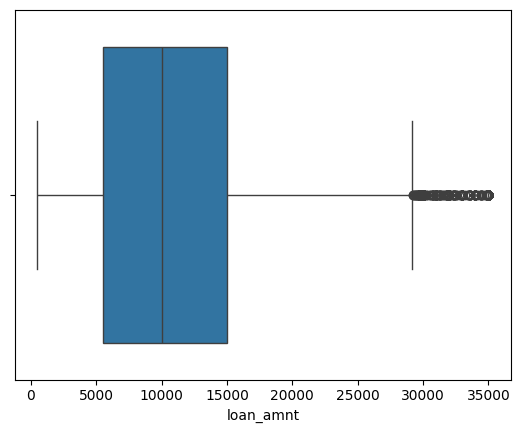

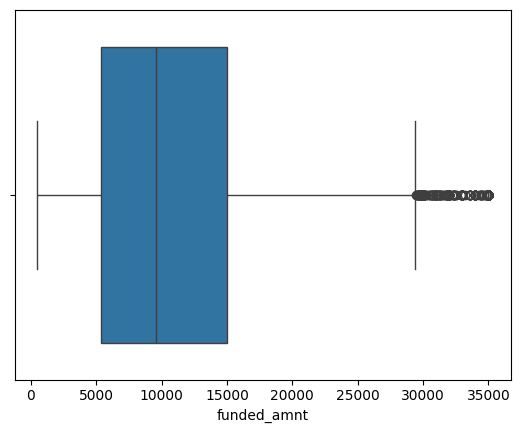

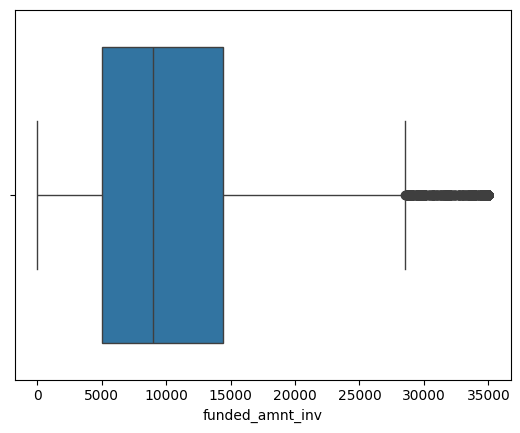

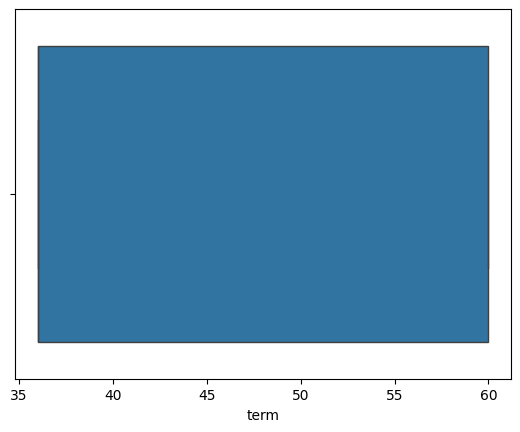

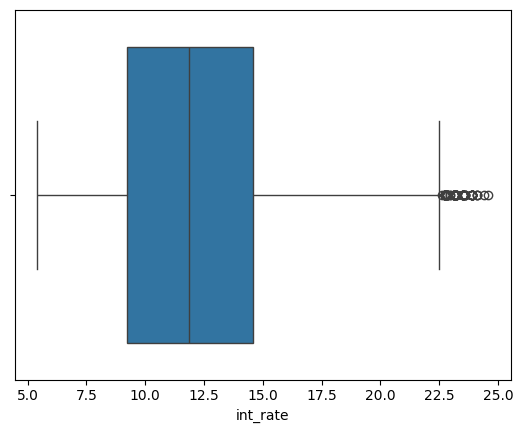

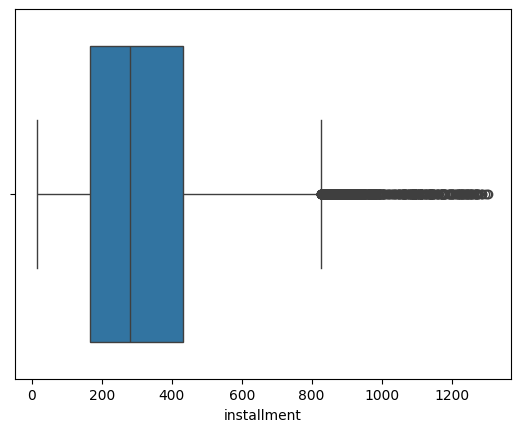

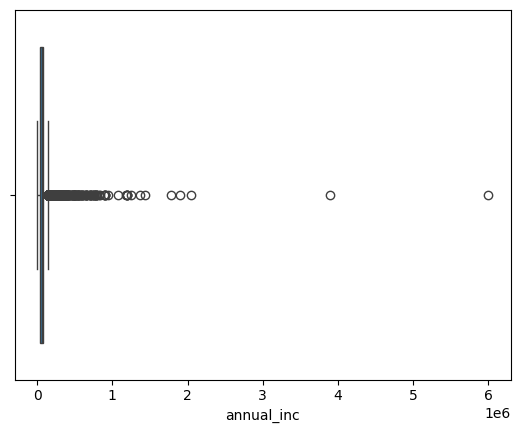

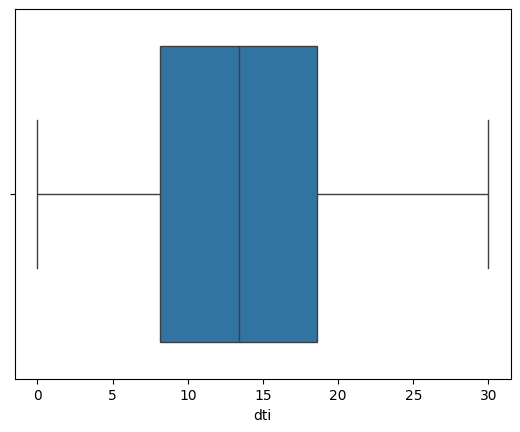

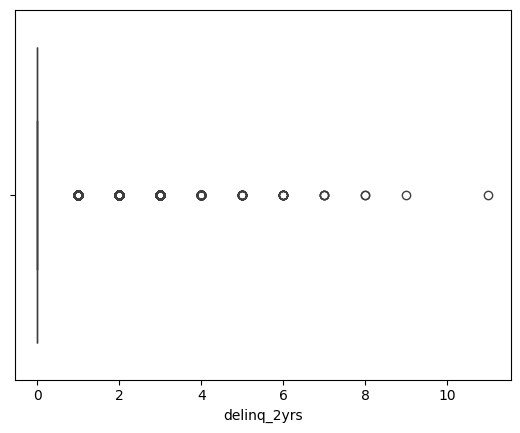

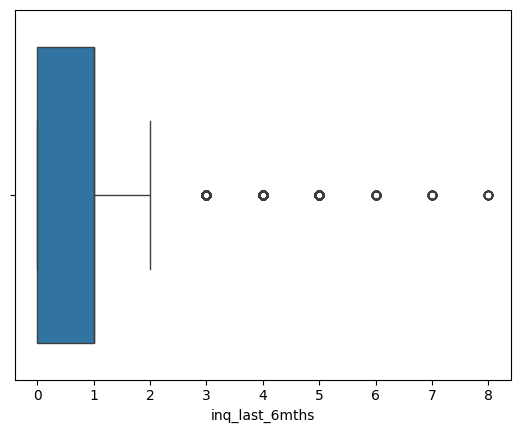

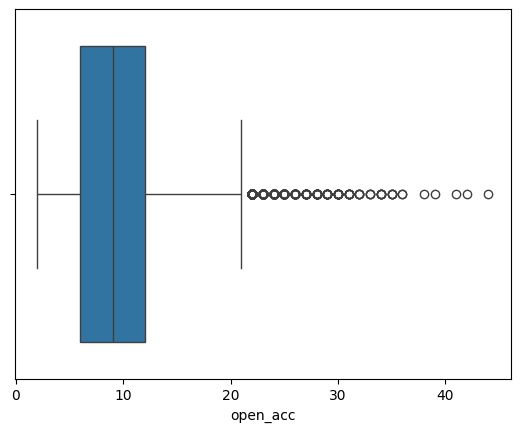

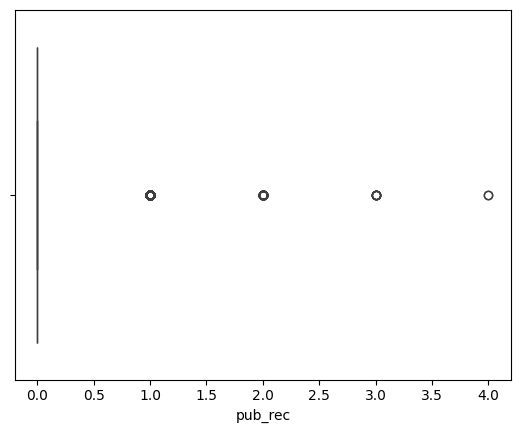

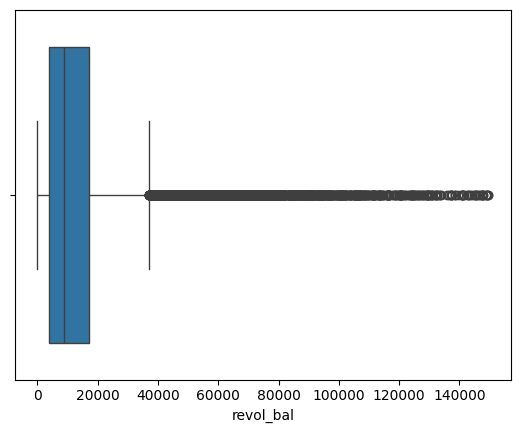

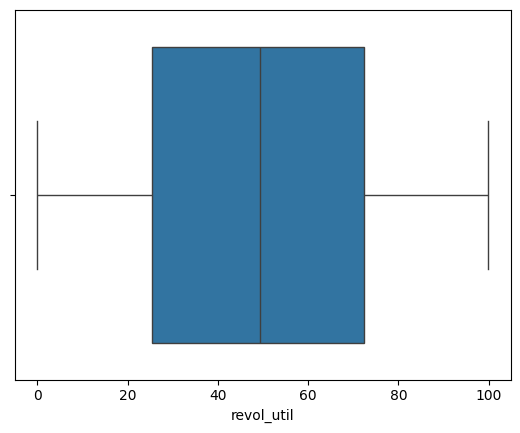

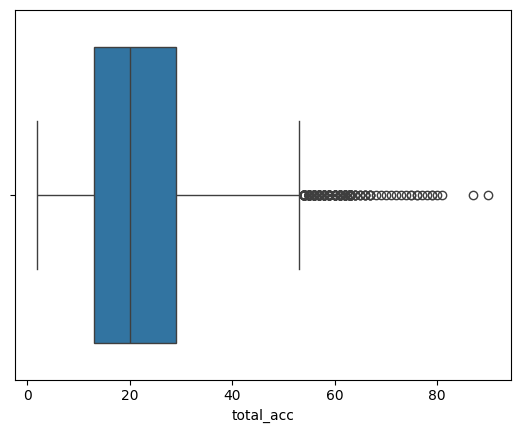

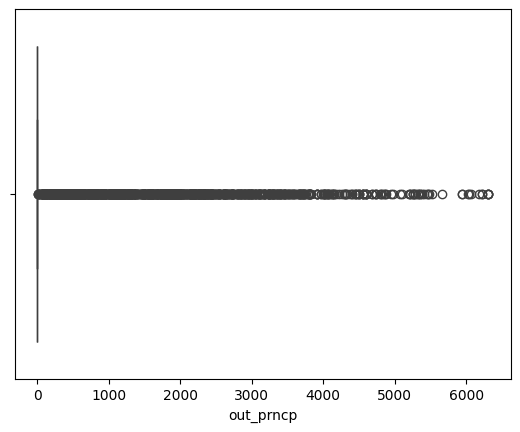

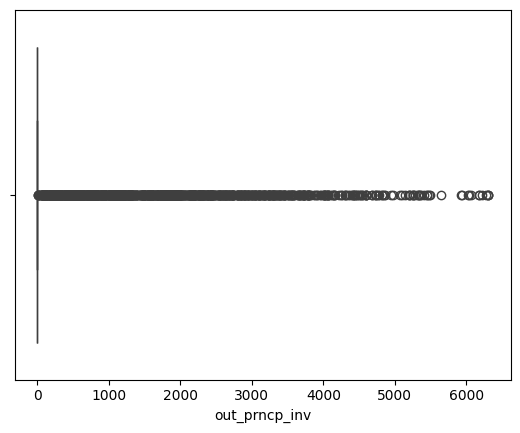

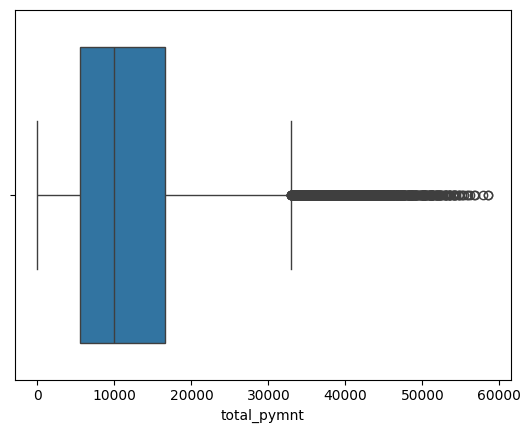

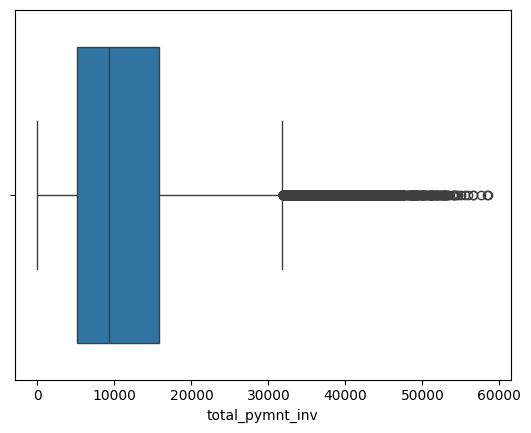

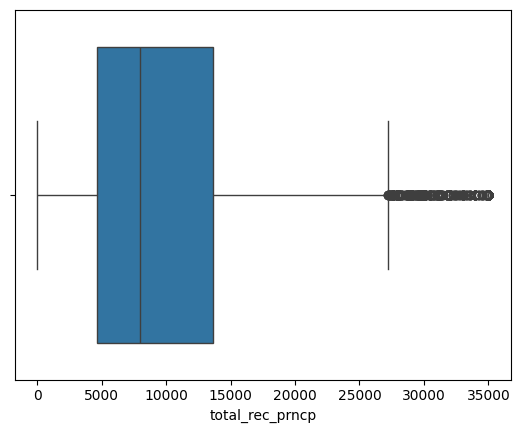

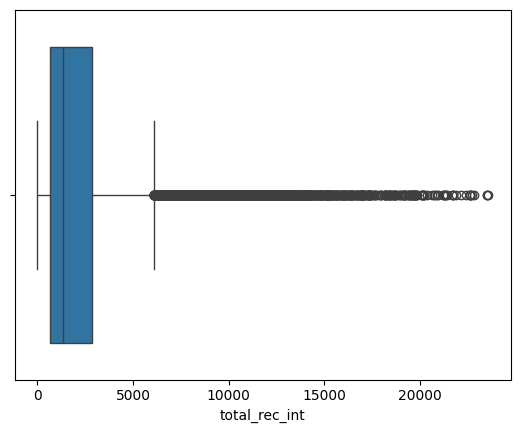

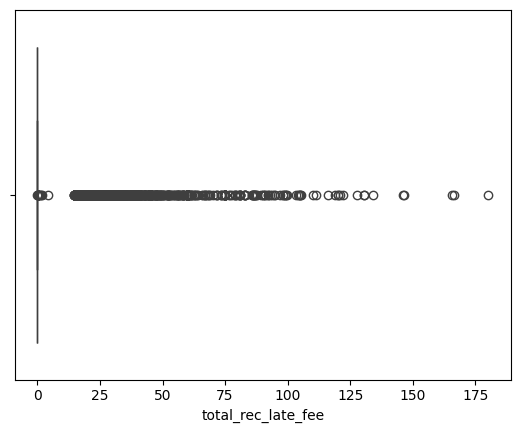

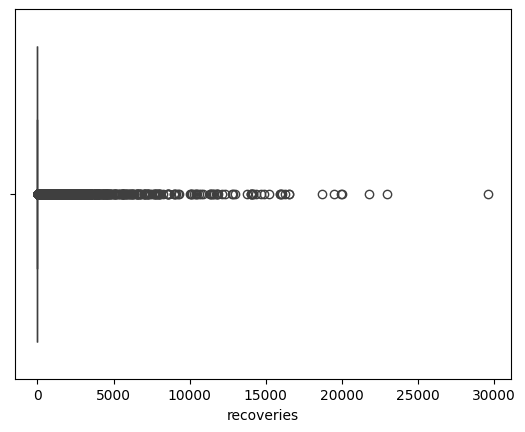

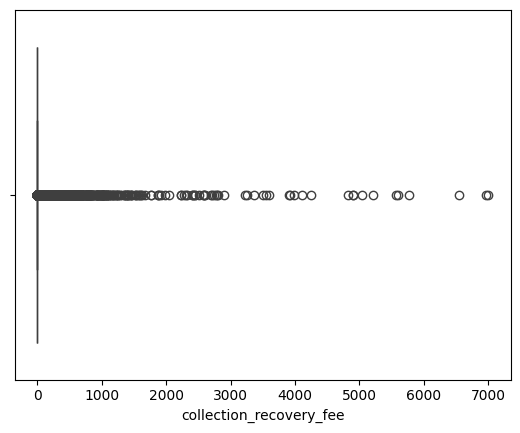

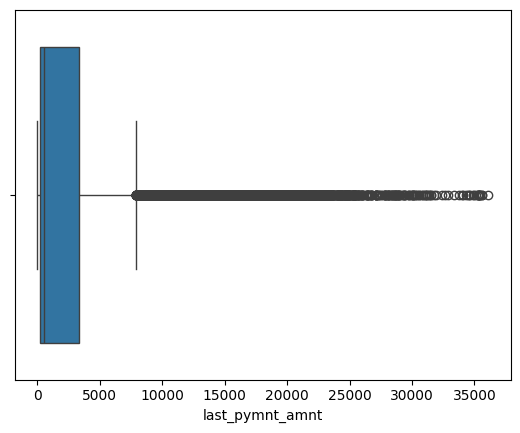

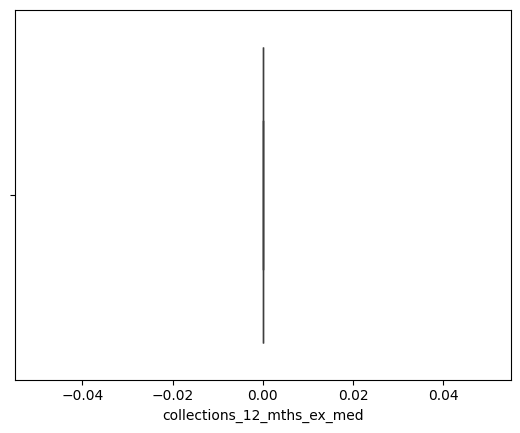

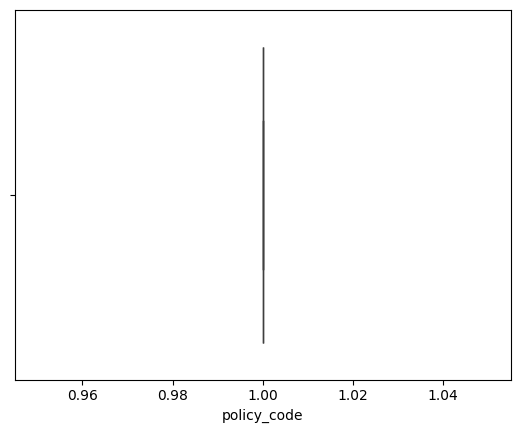

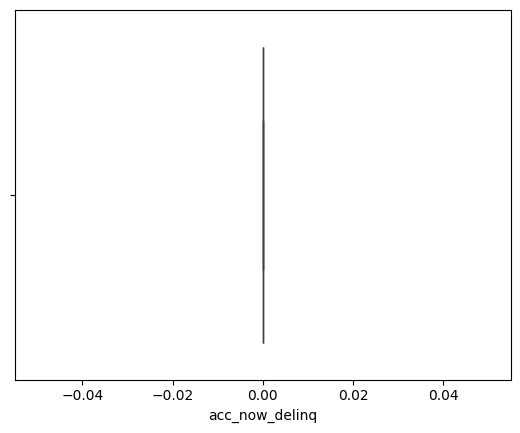

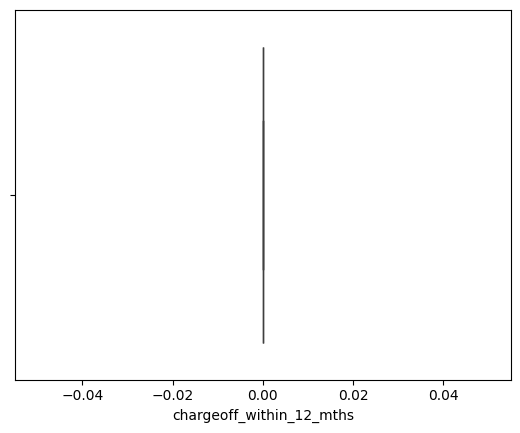

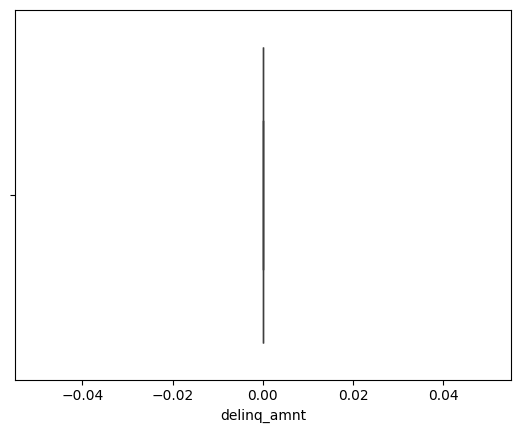

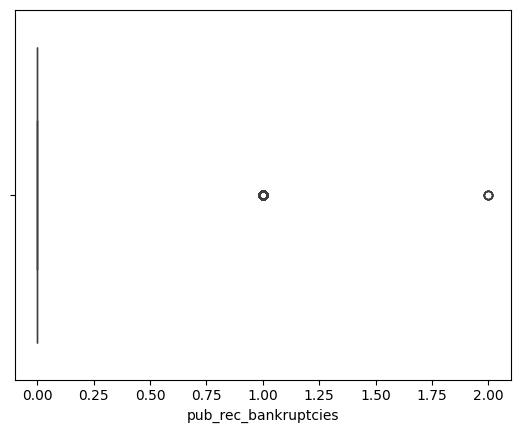

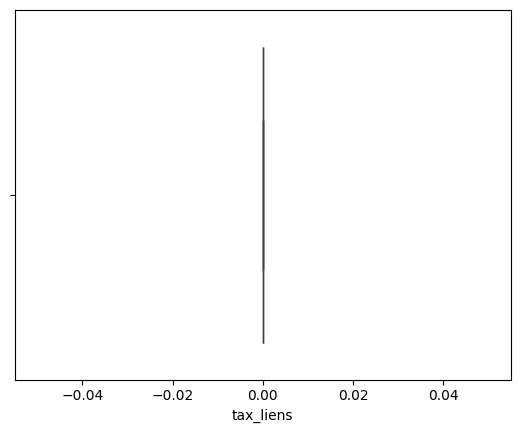

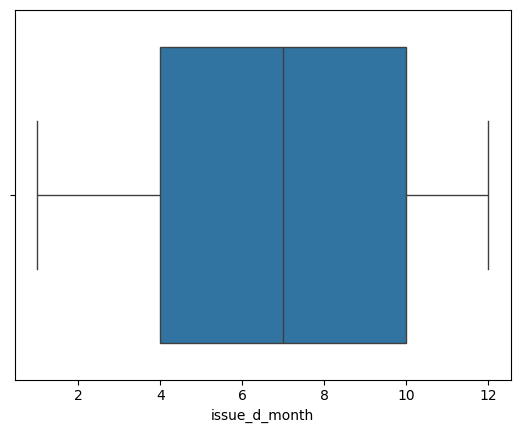

In [ ]:
def visualize_boxplot(column_name):
  sns.boxplot(data=df_numeric,x=df_numeric[column_name]);
  plt.show()
for i in df_numeric.columns:
  visualize_boxplot(i)

In [ ]:
for i in df_numeric.columns:
  print(i)
  print(df_numeric[i].value_counts())

loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: loan_amnt, Length: 885, dtype: int64
funded_amnt
10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: funded_amnt, Length: 1041, dtype: int64
funded_amnt_inv
5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                ... 
4944.213109        1
18400.281660       1
14659.820000       1
6294.151315        1
11808.924370       1
Name: funded_amnt_inv, Length: 8205, dtype: int64
term
36    29096
60    10621
Name: term, dtype: int64
int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64
installment
311.11     68
180.96    

In [ ]:
#dropping collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens because they have same values in the respective columns
df_numeric=df_numeric.drop(['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1)

In [ ]:
df_numeric.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'issue_d_month'],
      dtype='object')

In [ ]:
#dropping funded_amnt_inv,out_prncp_inv,total_pymnt_inv as they are derived features
df_numeric=df_numeric.drop(['funded_amnt_inv','out_prncp_inv','total_pymnt_inv'],axis=1)

In [ ]:
loan['issue_d']

0       1900-12-11
1       1900-12-11
2       1900-12-11
3       1900-12-11
4       1900-12-11
           ...    
39712   1900-07-07
39713   1900-07-07
39714   1900-07-07
39715   1900-07-07
39716   1900-06-07
Name: issue_d, Length: 39717, dtype: datetime64[ns]

In [ ]:
#imputing missing values
df_numeric['pub_rec_bankruptcies']=df_numeric['pub_rec_bankruptcies'].fillna(df_numeric['pub_rec_bankruptcies'].median)
df_numeric['revol_util']=df_numeric['revol_util'].fillna(df_numeric['revol_util'].median)
df_numeric.isnull().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
annual_inc                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
total_pymnt                0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
pub_rec_bankruptcies       0
issue_d_month              0
dtype: int64

In [ ]:
df=pd.concat([df_categorical,df_numeric],axis=1)

<Axes: title={'center': 'Term Distribution'}, ylabel='term'>

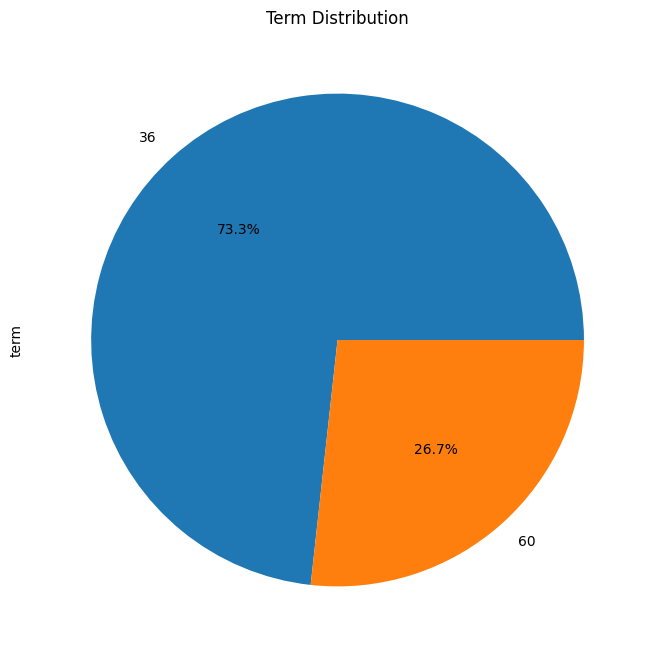

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Term Distribution')
df['term'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: title={'center': 'Employment Length Distribution'}, ylabel='emp_length'>

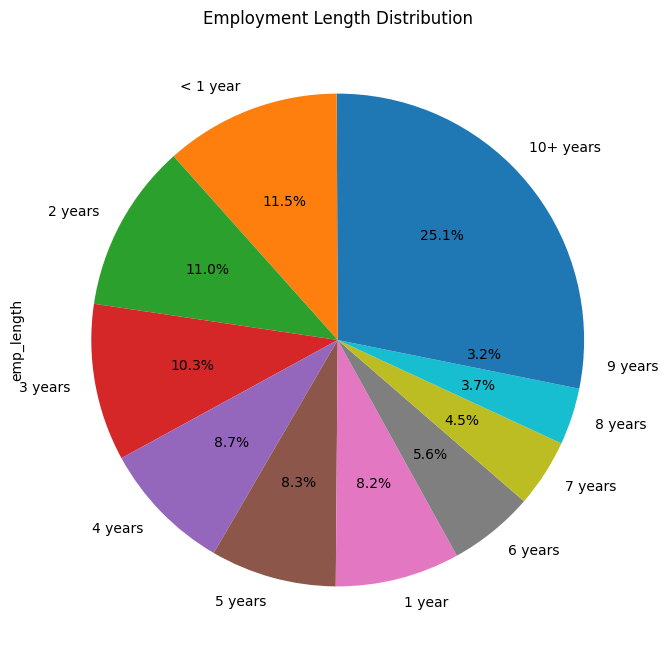

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Employment Length Distribution')
df['emp_length'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: title={'center': 'Inquiry Last 6 months Distribution'}>

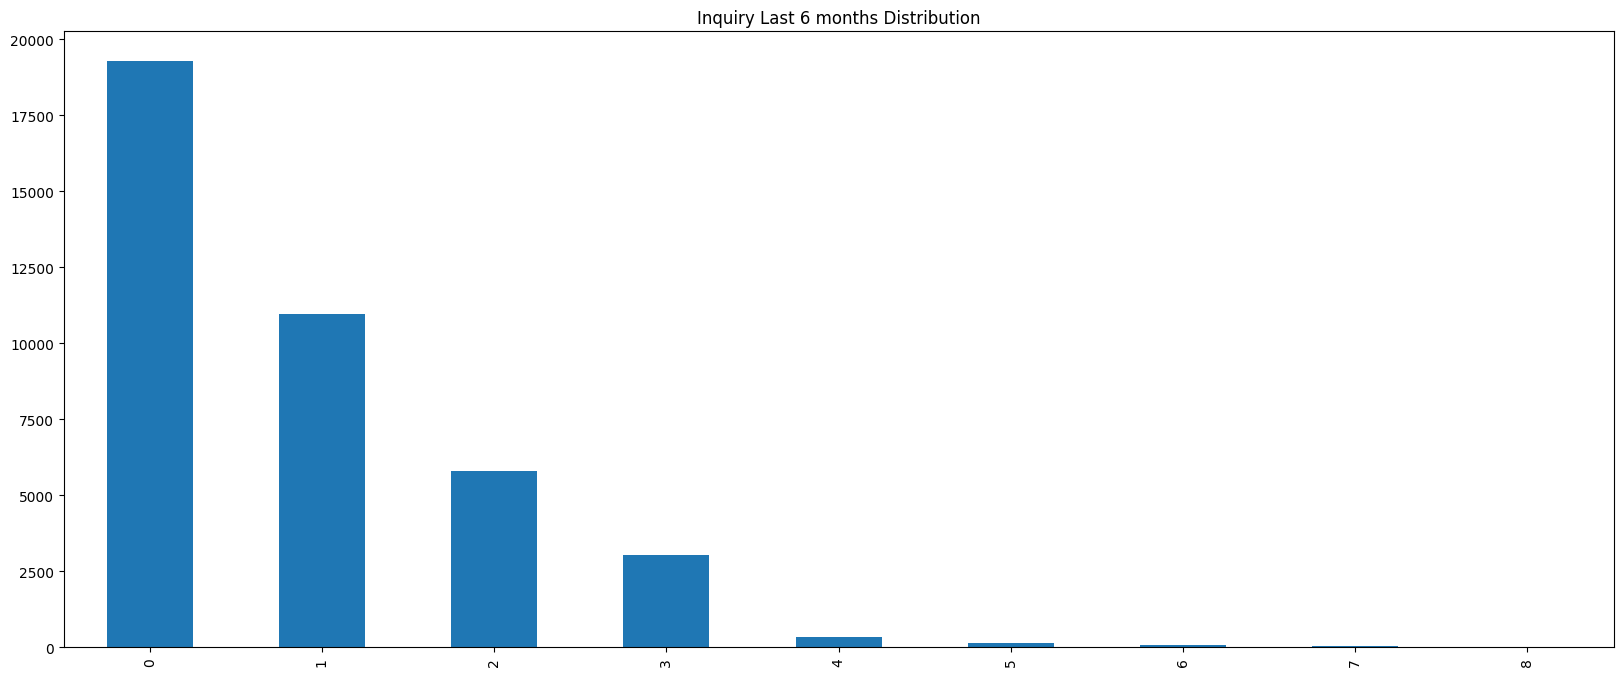

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Inquiry Last 6 months Distribution')
df['inq_last_6mths'].value_counts().plot(kind='bar')

<Axes: title={'center': 'Home Ownership Distribution'}, ylabel='home_ownership'>

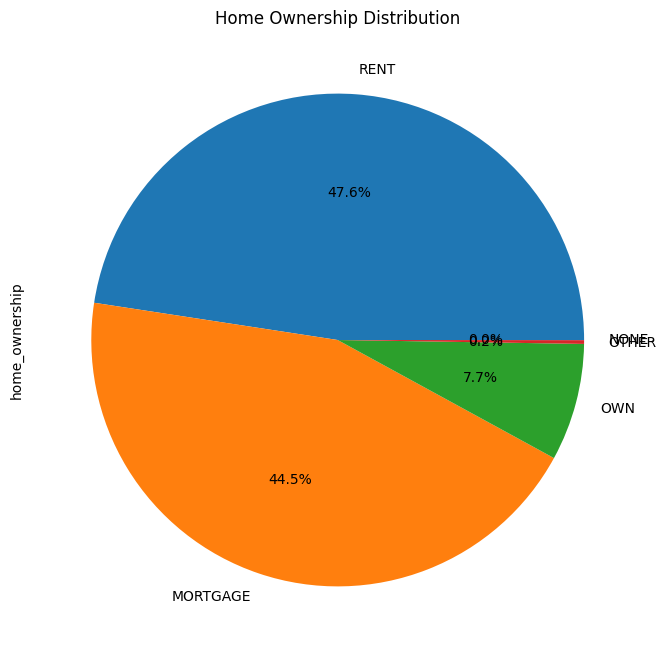

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Home Ownership Distribution')
df['home_ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: title={'center': 'Verification Status Distribution'}, ylabel='verification_status'>

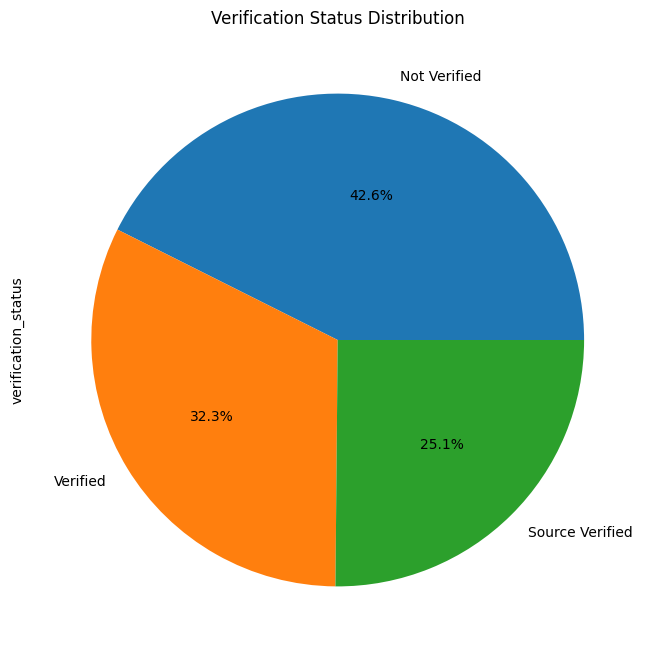

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Verification Status Distribution')
df['verification_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: title={'center': 'Purpose Distribution'}>

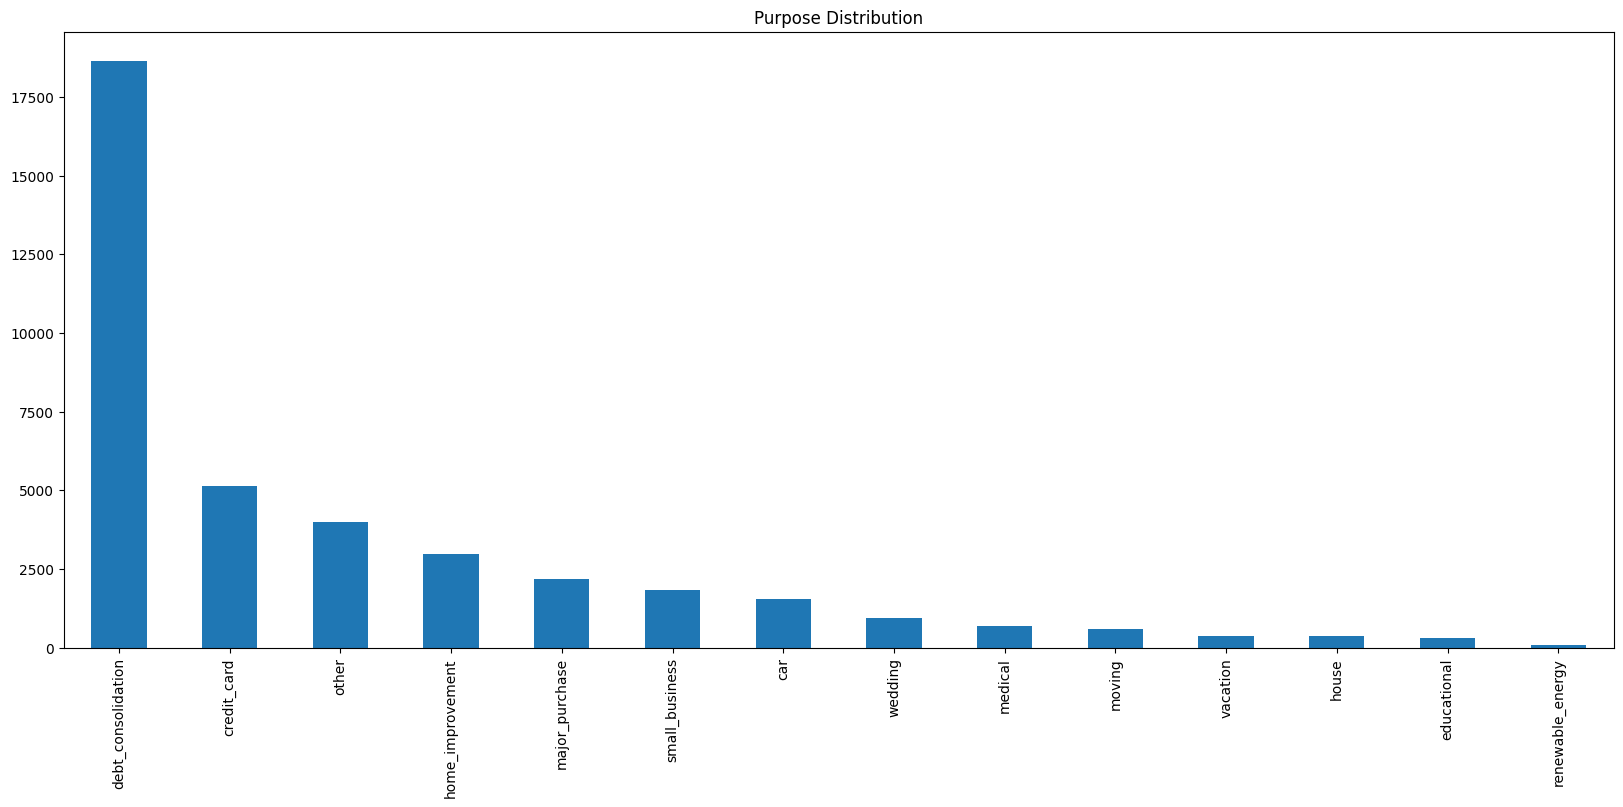

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Purpose Distribution')
df['purpose'].value_counts().plot(kind='bar')

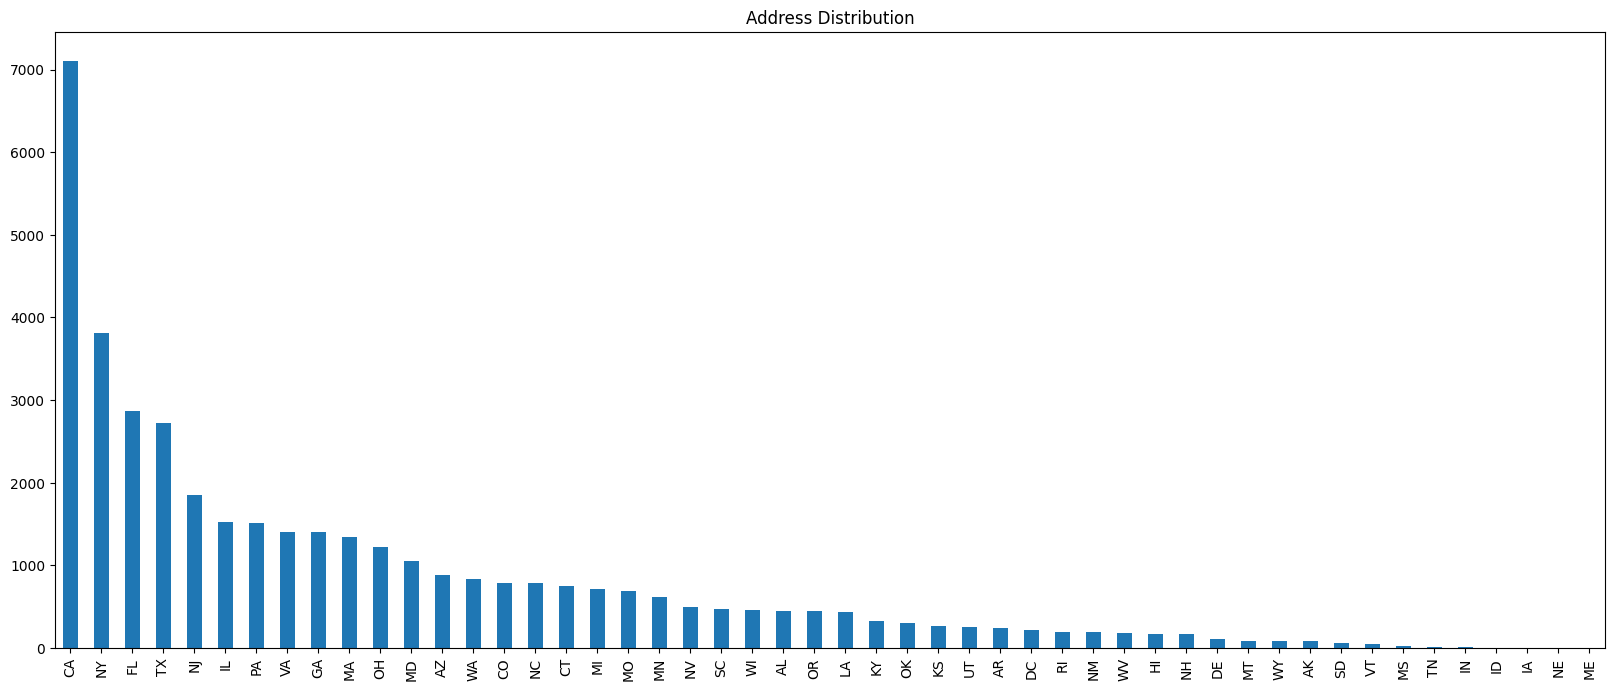

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Address Distribution')
df['addr_state'].value_counts().plot(kind='bar')
plt.show()

# Univariate Analysis

In [ ]:
loan_charged_off = df.loc[loan['loan_status'] == 'Charged Off']


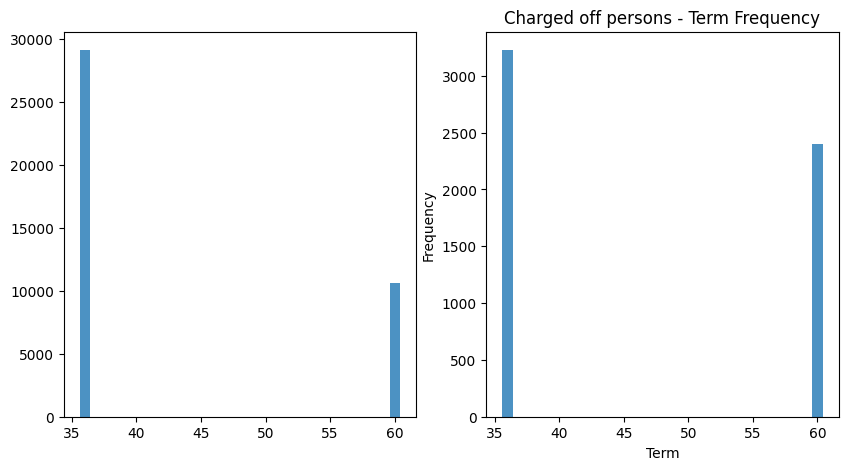

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plt.title('Persons - Term Frequency')
plt.xlabel('Term')
plt.ylabel('Frequency')
term_count = df['term'].value_counts()
ax1.bar(term_count.index, term_count.values, alpha=0.8)
plt.title('Charged off persons - Term Frequency')
plt.xlabel('Term')
plt.ylabel('Frequency')
loan_charged_off = df.loc[df['loan_status'] == 'Charged Off']
term_count_charged_off = loan_charged_off['term'].value_counts()
ax2.bar(term_count_charged_off.index, term_count_charged_off.values, alpha=0.8)
plt.show()

In [ ]:
term_count

36    29096
60    10621
Name: term, dtype: int64

In [ ]:
term_count_charged_off


36    3227
60    2400
Name: term, dtype: int64

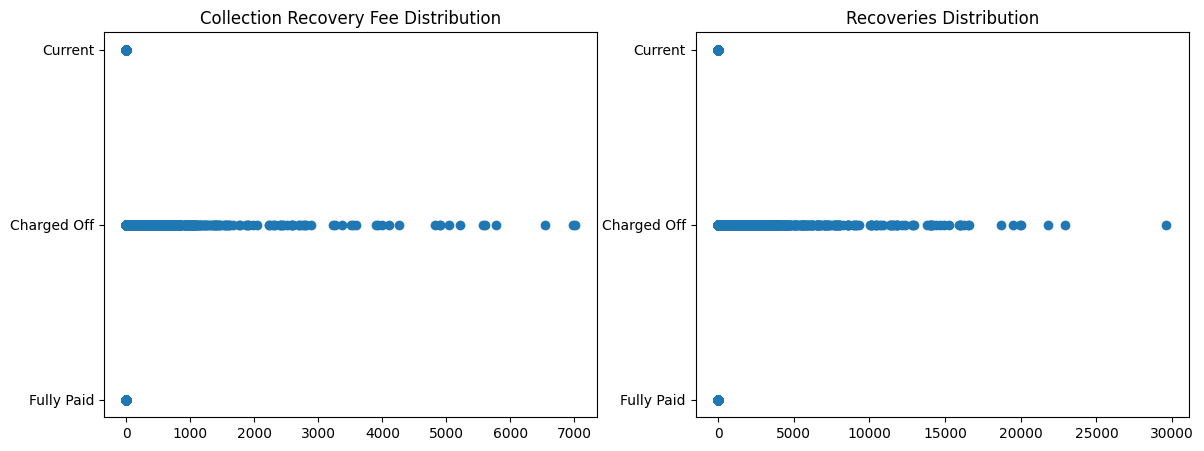

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
plt.title('Collection Recovery Fee Distribution')
plt.scatter(df.collection_recovery_fee, df.loan_status)
plt.subplot(1,2,2)
plt.title('Recoveries Distribution')
plt.scatter(df.recoveries, df.loan_status)

<Axes: xlabel='loan_status', ylabel='inq_last_6mths'>

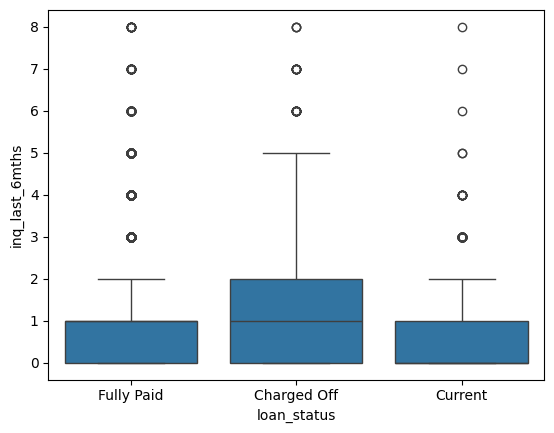

In [ ]:
sns.boxplot(y='inq_last_6mths', x='loan_status', data=df)


Text(0.5, 1.0, 'Employment Length Distribution [Charged Off]')

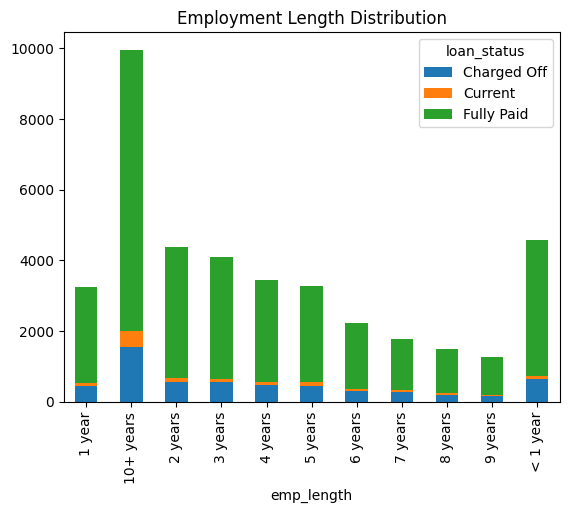

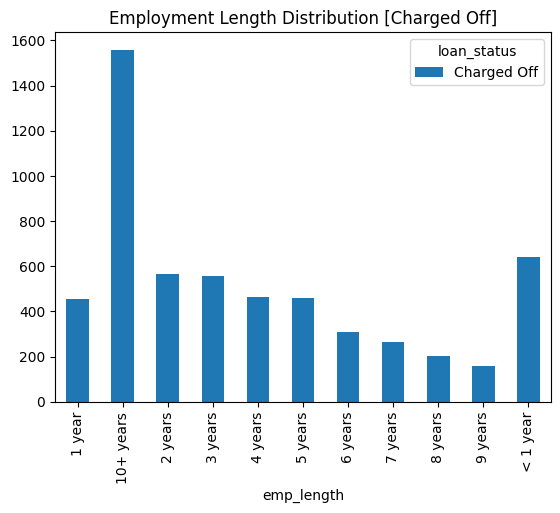

In [ ]:
aggre= df.groupby(['emp_length','loan_status'])['emp_length'].agg(Frequency='count')
aggre.Frequency.unstack().plot.bar(stacked=True)
plt.title('Employment Length Distribution')
aggre= loan_charged_off.groupby(['emp_length','loan_status'])['emp_length'].agg(Frequency='count')
aggre.Frequency.unstack().plot.bar(stacked=True)
plt.title('Employment Length Distribution [Charged Off]')

# GRADED

Text(0.5, 1.0, 'Sub Grade and its probability of being Charged Off')

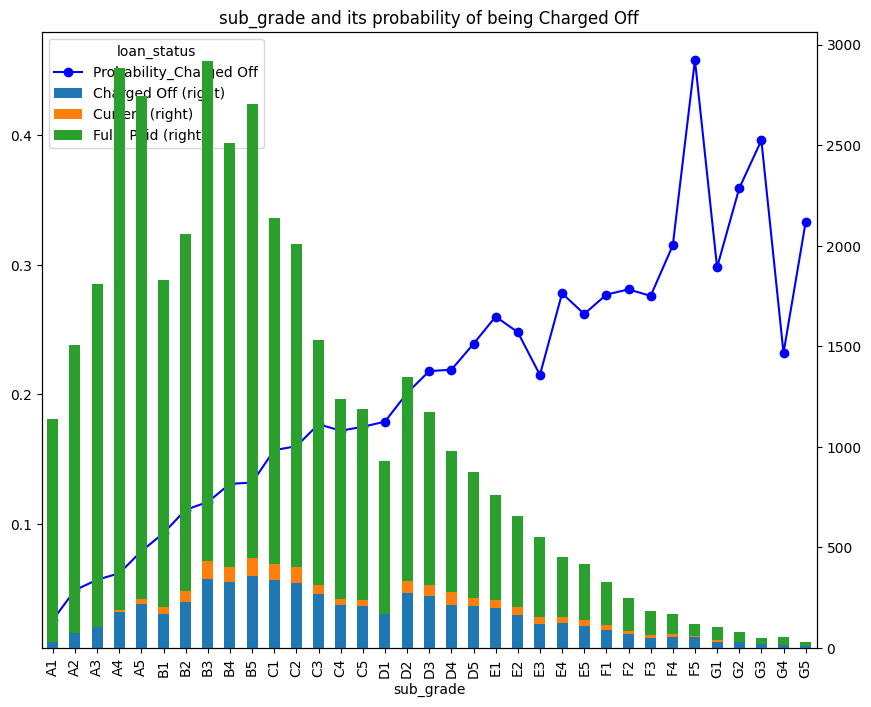

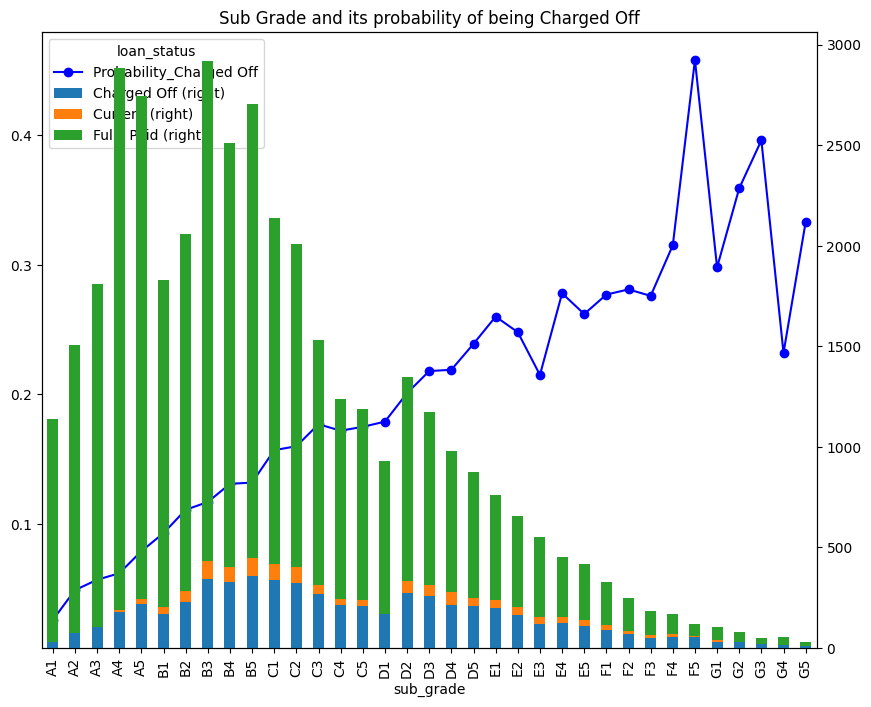

In [ ]:
# sub_grade

crosstab = pd.crosstab(df['sub_grade'], df['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
linePlot = crosstab[['Probability_Charged Off']]
ax = linePlot.plot(figsize=(10,8), marker='o',color = 'b')

aggre= df.groupby(['sub_grade','loan_status'])['sub_grade'].agg(Frequency='count')
aggre.Frequency.unstack().plot.bar(stacked=True, ax = ax, secondary_y=True)
plt.title("sub_grade and its probability of being Charged Off")

## Subgrade
crosstab = pd.crosstab(df['sub_grade'], df['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
linePlot = crosstab[['Probability_Charged Off']]
ax = linePlot.plot(figsize=(10,8), marker='o',color = 'b')

aggre= df.groupby(['sub_grade','loan_status'])['sub_grade'].agg(Frequency='count')
aggre.Frequency.unstack().plot.bar(stacked=True, ax = ax, secondary_y=True)
plt.title("Sub Grade and its probability of being Charged Off")